In [1]:
import pandas as pd
import numpy as np

In [51]:
df = pd.read_csv(r"G:\ML Deployment\Heart Disease Prediction\heart.csv")

In [23]:
df2=df.copy()

In [24]:
df3= df.copy()

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


EDA:

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. 
I'll plot a simple box plot which is the best visualization for detecting outliers

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

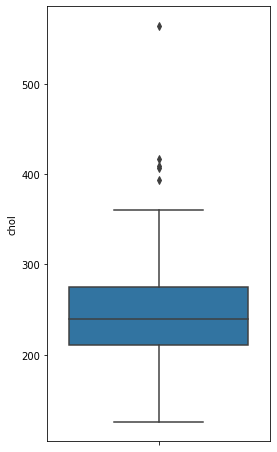

In [43]:
plt.figure(figsize=(4,8))
sns.boxplot(y=df.chol)

From the above box plot, we can surely observe that there are outliers in it!

1) Interquartile Range Method:

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.


In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.


It is the difference between the third quartile and the first quartile (IQR = Q3 -Q1). Outliers in this case are defined as the observations that are below (Q1 − 1.5x IQR) or boxplot lower whisker or above (Q3 + 1.5x IQR) or boxplot upper whisker. It can be visually represented by the box plot.

In [16]:
def out_lyr(df,column):
    global lower,upper
    q25,q75 = np.quantile(df[column],0.25),np.quantile(df[column],0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower,upper = q25 - cut_off,q75+cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [17]:
out_lyr(df,'chol')

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


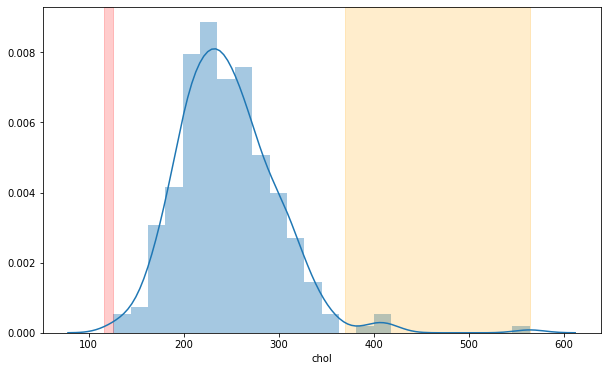

In [22]:
plt.figure(figsize = (10,6))
sns.distplot(df.chol, kde=True)
plt.axvspan(xmin = lower,xmax= df.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= df.chol.max(),alpha=0.2, color='orange')

In [60]:
df_new = df[(df['chol'] < upper) | (df['chol'] > lower)]


method 2:

In [56]:
upper_val = np.percentile(df.chol,[99])[0]

In [57]:
lower_val = np.percentile(df.chol,[1])[0]

In [58]:
df[(df.chol)>upper_val]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [40]:
df.chol[(df.chol>3*upper_val)] = 3*upper_val

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
df[(df.chol)<lower_val]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
53,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [42]:
df.chol[(df.chol<0.3*lower_val)] = 3*lower_val

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
new_df2 = df2.drop(df2.index[[53,111,301,28,85,202,246]])

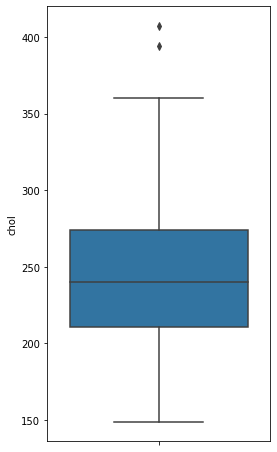

In [48]:
plt.figure(figsize=(4,8))
sns.boxplot(y=new_df2.chol)

In [61]:
len(df_new)

303

In [62]:
len(new_df2)

296

2) Standard Deviation Method:

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

In [65]:
stu_data = pd.read_csv(r"G:\Data Sets\DataSets\student performance prediction\StudentsPerformance.csv")

In [66]:
stu_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
stu_data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Let's consider the "writing score" for inspection. I'll plot a simple density plot which is also one of the best visualization for detecting outliers¶

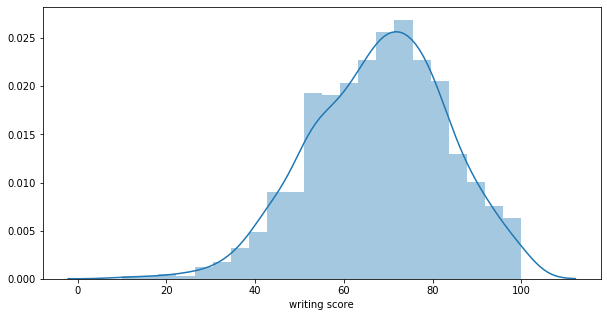

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(stu_data['writing score'])
plt.show()

By the looks of it, it is left tailed and it surely has outliers

In [70]:
def out_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [72]:
out_std(stu_data,'writing score')

The lower bound value is 22.467028967391073
The upper bound value is 113.64097103260893
Total number of outliers are 4


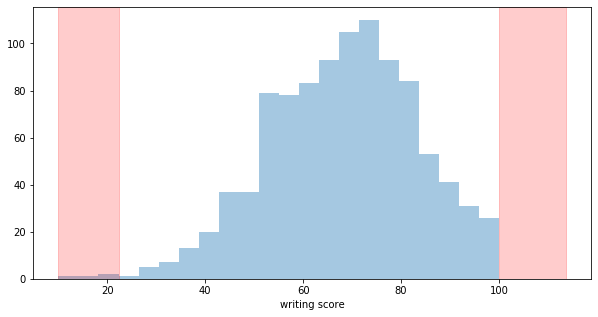

In [74]:
plt.figure(figsize = (10,5))
sns.distplot(stu_data['writing score'], kde=False)
plt.axvspan(xmin = lower,xmax= stu_data['writing score'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= stu_data['writing score'].max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

Remedial Measure:

Remove the records which are above the upper bound value and records below the lower bound value!

In [75]:
stu_new = stu_data[(stu_data['writing score'] < upper) | (stu_data['writing score'] > lower)]